# K Nearest Neighbors Project 

In this project we will standardize the data and try to classify our data based on the Target Class column. 

## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data
**Read the 'KNN_Project_Data csv file into a dataframe **

In [77]:
df = pd.read_csv('KNN_Project_Data')

**Check the head of the dataframe.**

In [78]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

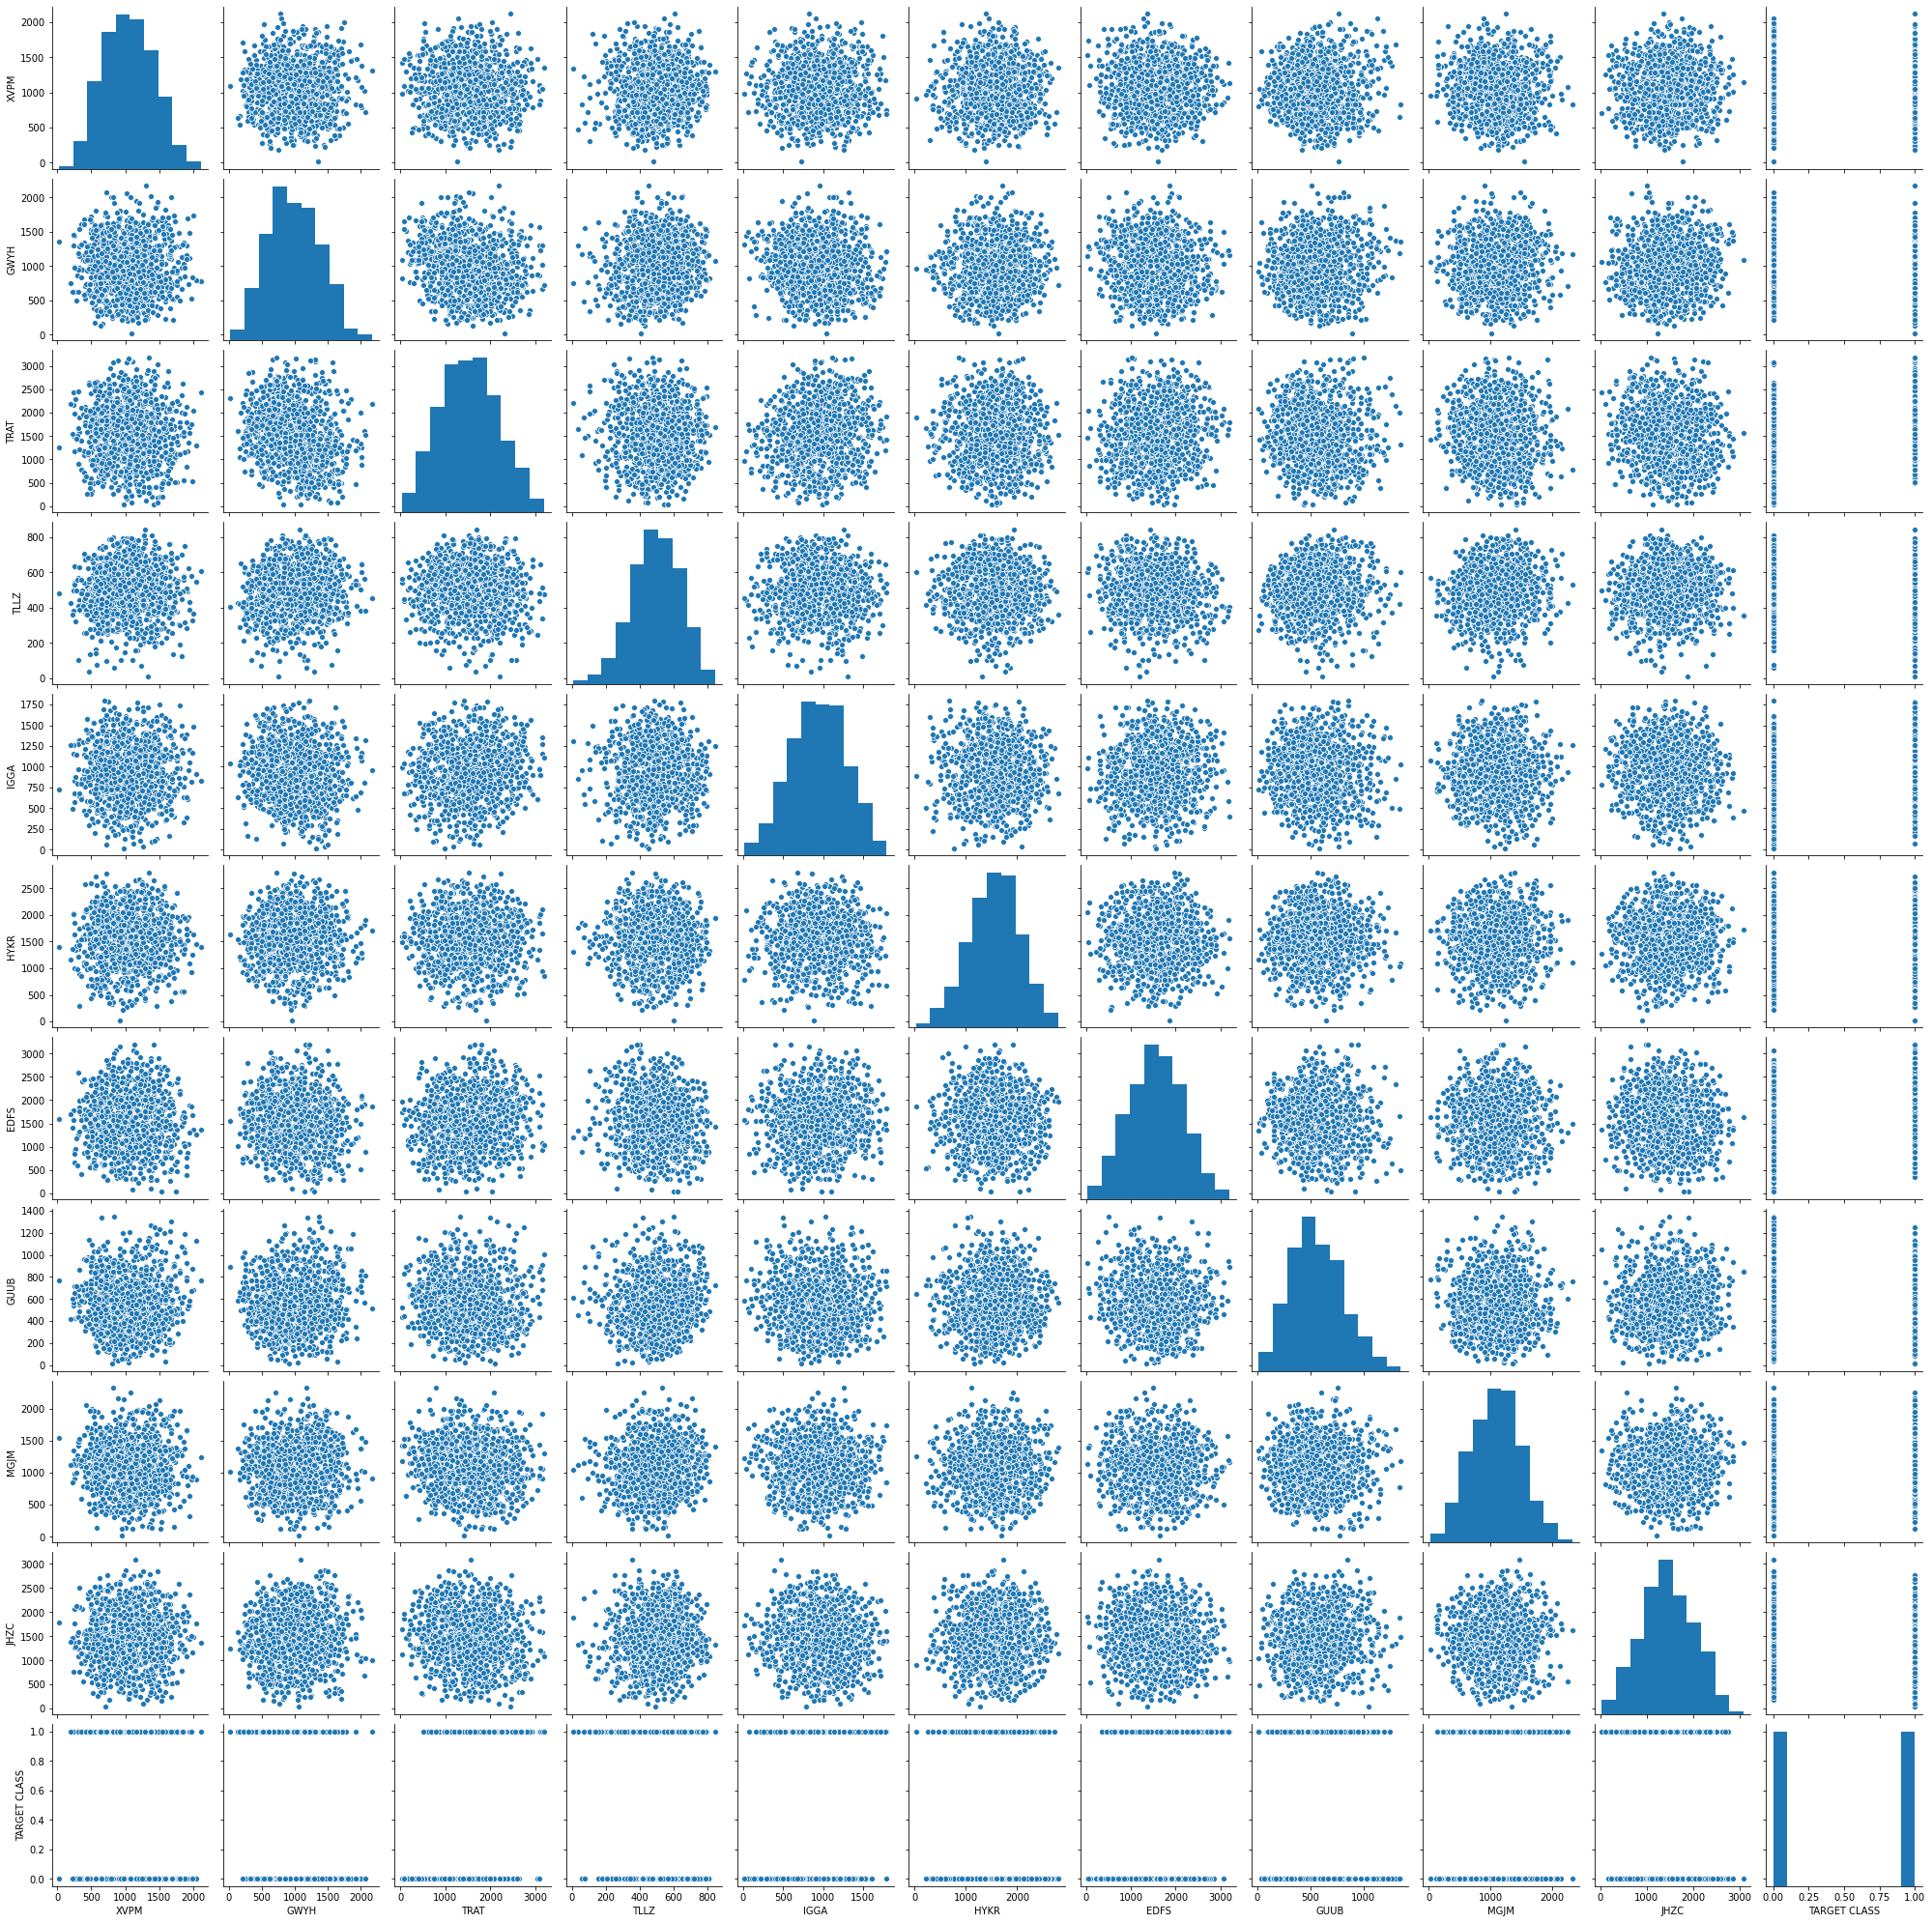

In [79]:
sns.pairplot(data=df, palette='viridis')

# Standardize the Variables

Time to standardize the variables.

**Import StandardScaler from Scikit learn.**

In [81]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler and fit the dataframe.**

**Use the .transform() method to transform the features to a scaled version.**

In [84]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [86]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, df['TARGET CLASS'], test_size=0.30)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [91]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [92]:
knn_model = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [93]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [94]:
predictions = knn_model.predict(X_test)

** Create a confusion matrix and classification report.**

In [95]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [96]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76       155
           1       0.75      0.72      0.73       145

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300

[[121  34]
 [ 41 104]]


# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

**Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.**

In [101]:
error_data = []

for i in range(1,50):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    predictions = knn_model.predict(X_test)
    error_data.append(np.mean(y_test != predictions))

In [102]:
error_data

[0.25,
 0.24333333333333335,
 0.19333333333333333,
 0.20666666666666667,
 0.19,
 0.17666666666666667,
 0.17,
 0.19,
 0.2,
 0.2,
 0.18666666666666668,
 0.20333333333333334,
 0.17333333333333334,
 0.18,
 0.17666666666666667,
 0.18666666666666668,
 0.17666666666666667,
 0.19,
 0.18666666666666668,
 0.18,
 0.18666666666666668,
 0.17333333333333334,
 0.17666666666666667,
 0.17333333333333334,
 0.18,
 0.18333333333333332,
 0.19,
 0.18666666666666668,
 0.18333333333333332,
 0.19333333333333333,
 0.17333333333333334,
 0.18,
 0.17666666666666667,
 0.18,
 0.19,
 0.18666666666666668,
 0.18333333333333332,
 0.17333333333333334,
 0.17333333333333334,
 0.18333333333333332,
 0.18666666666666668,
 0.18666666666666668,
 0.19333333333333333,
 0.18666666666666668,
 0.18333333333333332,
 0.19,
 0.18666666666666668,
 0.19,
 0.19]

**Now create the following plot using the information from your for loop.**

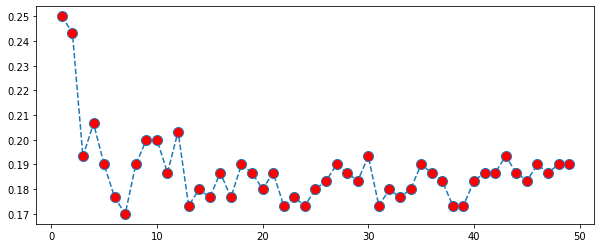

In [103]:
plt.figure(figsize=(10,4))
plt.plot(range(1,50), error_data, linestyle='--', markerfacecolor='red', markersize=10, marker='o')

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [104]:
knn_model = KNeighborsClassifier(n_neighbors=42)
knn_model.fit(X_train, y_train)
predictions = knn_model.predict(X_test)


In [106]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[120  35]
 [ 21 124]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       155
           1       0.78      0.86      0.82       145

    accuracy                           0.81       300
   macro avg       0.82      0.81      0.81       300
weighted avg       0.82      0.81      0.81       300

